In [1]:
from dataset import get_loader
from utils import plot_batch

In [2]:
from pathlib import Path

In [3]:
from config import Config

In [4]:
celeb_path = Path('./data/CelebA')
train_path = celeb_path / 'train'
test_path = celeb_path / 'test'
val_path = celeb_path / 'validation'

In [5]:
model_id = 'resnet50'

In [6]:
config = Config(
    model_id=model_id,
    img_size=224,
    train_path=train_path,
    test_path=test_path,
    val_path=val_path,
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

In [7]:
batch_size = 2
image_limit = 2

learning_rate = 1e-8
num_epochs = 10

In [8]:
train_loader = get_loader(
    data_path=train_path,
    config=config,
    batch_size=batch_size,
    image_limit=image_limit,
    augment=True
)

In [9]:
val_loader = get_loader(
    data_path=val_path,
    config=config,
    batch_size=batch_size,
    image_limit=image_limit,
    augment=True
)

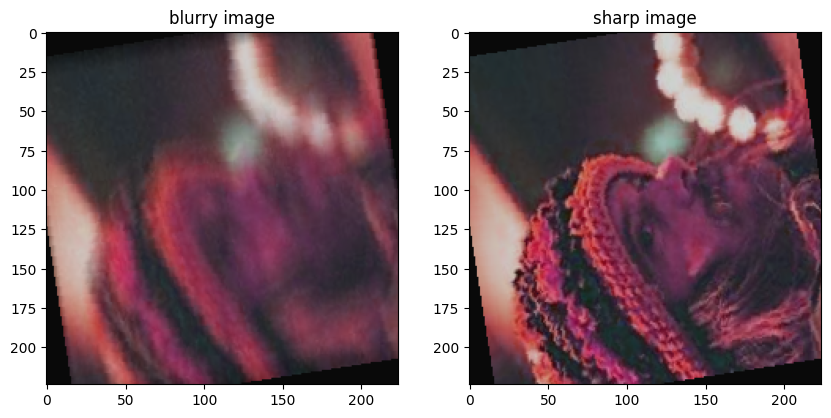

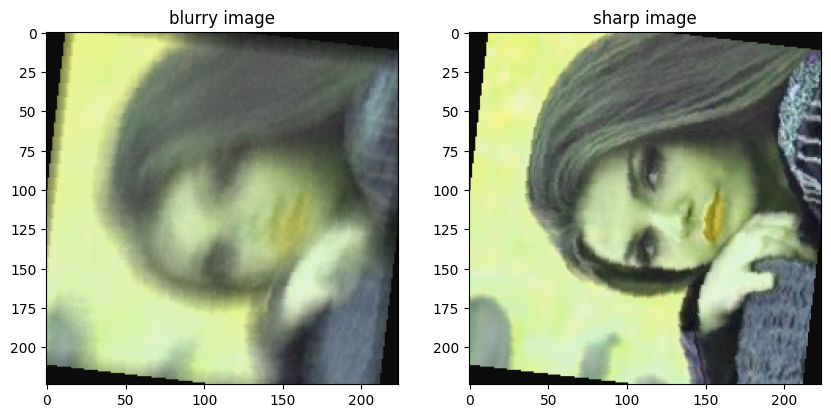

In [10]:
plot_batch(train_loader, batch_index=0)

In [11]:
from cnn import get_model

In [12]:
model = get_model(config=config)

In [13]:
from trainer import Trainer

In [14]:
import torch.nn as nn
import torch

In [15]:
mse = nn.MSELoss()

In [16]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
trainer = Trainer(
    model=model,
    optimizer=optimizer,
    criterion=mse,
    config=config,
    debug=True,
    debug_step=5
)

In [18]:
Trainer.supported_models()

['resnet50', 'resnet101', 'resnet152', 'inception_v3']

Starting Epoch 1 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000076293944].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000076293944].


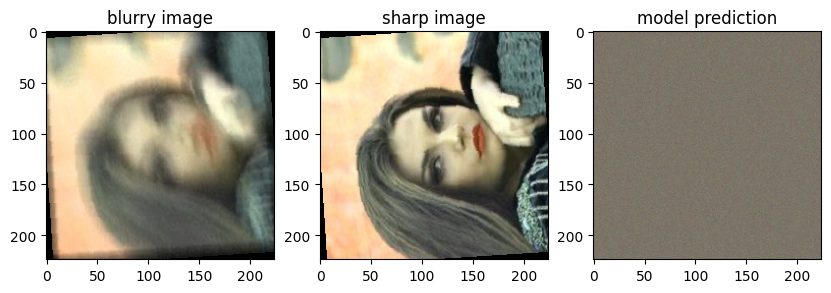

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9303728332519532].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9303728332519532].


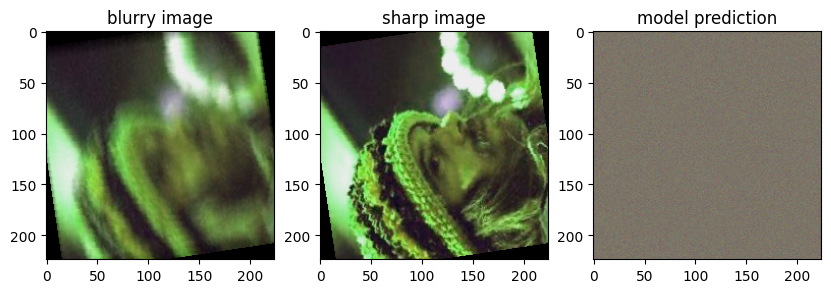

100%|██████████| 1/1 [00:00<00:00, 31.60batch/s]


Epoch: 1, Train loss: 3.2215, Validation loss: 3.0418
Starting Epoch 2 of 10.


100%|██████████| 1/1 [00:00<00:00, 35.40batch/s]


Epoch: 2, Train loss: 3.7413, Validation loss: 3.1063
Starting Epoch 3 of 10.


100%|██████████| 1/1 [00:00<00:00, 34.00batch/s]


Epoch: 3, Train loss: 3.2572, Validation loss: 2.8399
Starting Epoch 4 of 10.


100%|██████████| 1/1 [00:00<00:00, 32.48batch/s]


Epoch: 4, Train loss: 3.1542, Validation loss: 3.2003
Starting Epoch 5 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]

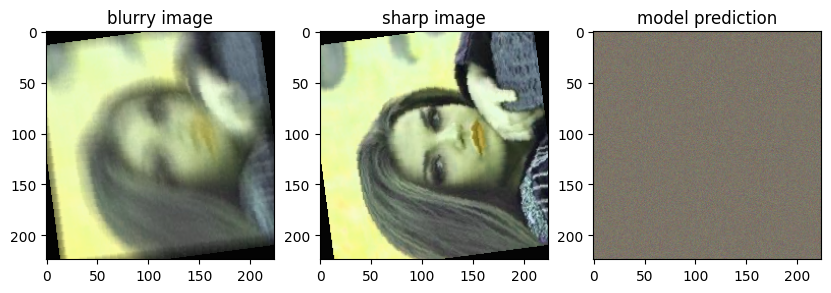

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.03961368775367735..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.039966848254203824..1.0000000236034394].


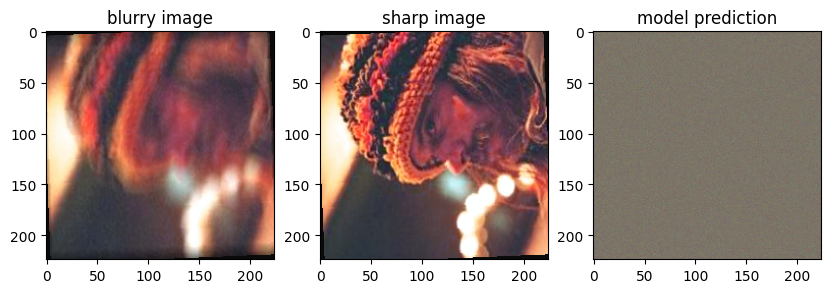

100%|██████████| 1/1 [00:00<00:00, 32.26batch/s]


Epoch: 5, Train loss: 2.9955, Validation loss: 3.2148
Starting Epoch 6 of 10.


100%|██████████| 1/1 [00:00<00:00, 31.11batch/s]


Epoch: 6, Train loss: 2.9877, Validation loss: 3.3188
Starting Epoch 7 of 10.


100%|██████████| 1/1 [00:00<00:00, 34.78batch/s]


Epoch: 7, Train loss: 2.2928, Validation loss: 3.6030
Starting Epoch 8 of 10.


100%|██████████| 1/1 [00:00<00:00, 34.95batch/s]


Epoch: 8, Train loss: 2.5443, Validation loss: 2.7405
Starting Epoch 9 of 10.


100%|██████████| 1/1 [00:00<00:00, 34.06batch/s]


Epoch: 9, Train loss: 3.2710, Validation loss: 2.6877
Starting Epoch 10 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9999999964237213].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000076293944].


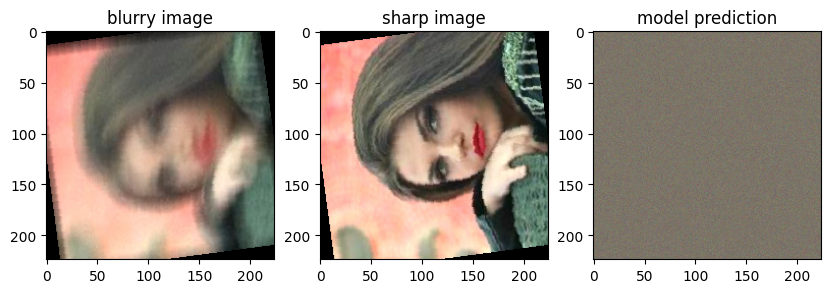

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.06871180546283717..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.06929652118682861..1.0000000236034394].


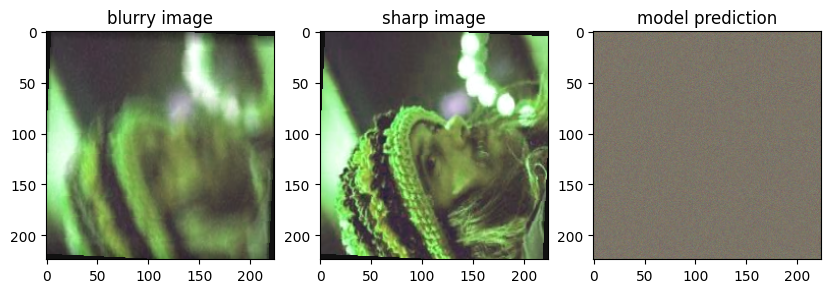

100%|██████████| 1/1 [00:00<00:00, 32.89batch/s]

Epoch: 10, Train loss: 2.5852, Validation loss: 2.8667


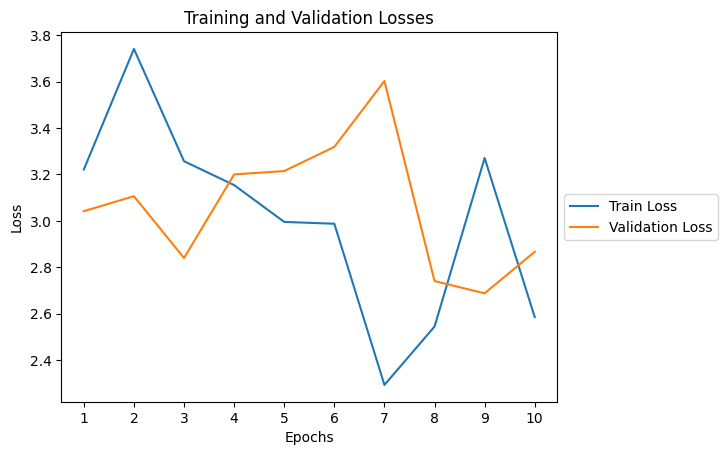

In [19]:
trainer.train(
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=num_epochs
)